<div style="display: flex; justify-content: center;">
    <img src="imagenes/pensandojpg.jpg" style="border-radius: 20px; width: 75%;">
</div>

<small> Imagen creada por IA generativa usando el siguiente pront: 'Dibújame un robot pensativo, apoyado en una mesa.  
 El dibujo no debe ser muy recargado, solo el robot y parte de la mesa.'<small>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import seaborn as sns
from scipy.stats import ttest_ind 
from scipy import stats
from scipy.stats import f_oneway

In [2]:
df_entradas_util_nuevo = pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\entradas_validas\df_entradas_util.parquet')
df_entradas_util_nuevo.head(5) 
df_con_motivos = df_entradas_util_nuevo.copy()

### La hipótesis a la que en este Jupyter se trata de dar respuesta es que el motivo de retirada estará bastante influenciado por la fecha y/o la hora.

>Para esto tendremos que usar la tabla de motivos, y usando sus códigos añadir el motivo a la tabla principal, eliminaremos las columnas innecesarias para una correcta   visualización.

In [3]:
df_con_motivos.drop(["deposito", "tipoVehiculo","grua", "tipoVia","via","numero", "cp"], axis=1, inplace=True)
df_con_motivos.head(5)

,motivo,turno,Fecha_e,FinDeSema,Festivo,Hora_e
idVehiculo,,,,,,
CO20160101002327,1.0,Noche,2016-01-01,False,Año Nuevo,00:05:00
CO20160101012710,9.0,Noche,2016-01-01,False,Año Nuevo,01:14:00
CO20160101031613,44.0,Noche,2016-01-01,False,Año Nuevo,02:42:00
CO20160101031820,1.0,Noche,2016-01-01,False,Año Nuevo,02:50:00
CO20160101031435,7.0,Noche,2016-01-01,False,Año Nuevo,03:05:00


In [4]:
motivos= pd.read_csv(r'C:\Users\pepea\Desktop\the_drige\EDA\datos\auxiliares\motivosretirada.csv', encoding="UTF-8", sep=";")
motivos.drop(["Reason","E. Reason"], axis=1, inplace=True) 
motivos['Codigo'] = motivos['Codigo'].astype(float)
motivos.head(5)

,Codigo,Motivo,E. Motivo
0,1.0,Doble Fila,Estacionar en doble fila
1,2.0,Carril Bus,Estacionar en los carriles reservados para la ...
2,3.0,Carga y Descarga,Estacionar en lugares reservados para carga y ...
3,4.0,Paso Peatones,Estacionar sobre zonas destinadas al uso de pe...
4,5.0,Centro Calzada,Estacionar ocupando la calzada


In [5]:
df_con_motivos['motivo'] = df_con_motivos['motivo'].map(motivos.set_index('Codigo')['Motivo'])

In [6]:
df_con_motivos.head(7)

,motivo,turno,Fecha_e,FinDeSema,Festivo,Hora_e
idVehiculo,,,,,,
CO20160101002327,Doble Fila,Noche,2016-01-01,False,Año Nuevo,00:05:00
CO20160101012710,Esquinas,Noche,2016-01-01,False,Año Nuevo,01:14:00
CO20160101031613,R Minusválido,Noche,2016-01-01,False,Año Nuevo,02:42:00
CO20160101031820,Doble Fila,Noche,2016-01-01,False,Año Nuevo,02:50:00
CO20160101031435,Prohibido Placas,Noche,2016-01-01,False,Año Nuevo,03:05:00
CO20160101033909,Paso Carruajes,Noche,2016-01-01,False,Año Nuevo,03:30:00
CO20160101054347,Quemado,Noche,2016-01-01,False,Año Nuevo,05:40:00


La columna 'motivo' es bastante descriptiva, pero en caso de necesitar explicación copiando el motivo y metiéndolo en el siguiente código se obtendrá una breve explicación

In [20]:
motivo = input("Por favor ingrese un motivo: ")
fila_motivo = motivos[motivos['Motivo'] == motivo]

if not fila_motivo.empty:
    e_motivo = fila_motivo.iloc[0]['E. Motivo']
    codigo = fila_motivo.iloc[0]['Codigo']
    print(f"La explicacion a '{motivo}' es: \n{e_motivo}.")
    print(f"Y su codigo es: {codigo}")
else:
    print("¿Que?...Por favor, copie y pegue.")

La explicacion a 'Otros' es: 
Todos aquellos supuestos que no están recogidos en el resto de casos.
Y su codigo es: 24.0


In [8]:
df_con_motivos.head(100)

,motivo,turno,Fecha_e,FinDeSema,Festivo,Hora_e
idVehiculo,,,,,,
CO20160101002327,Doble Fila,Noche,2016-01-01,False,Año Nuevo,00:05:00
CO20160101012710,Esquinas,Noche,2016-01-01,False,Año Nuevo,01:14:00
CO20160101031613,R Minusválido,Noche,2016-01-01,False,Año Nuevo,02:42:00
CO20160101031820,Doble Fila,Noche,2016-01-01,False,Año Nuevo,02:50:00
CO20160101031435,Prohibido Placas,Noche,2016-01-01,False,Año Nuevo,03:05:00
...,...,...,...,...,...,...
CO20160102183807,Prohibido Placas,Tarde,2016-01-02,True,No festivo,18:37:00
CO20160102185647,Prohibido Placas,Tarde,2016-01-02,True,No festivo,18:42:00
ES20160102191534,Precinto,Tarde,2016-01-02,True,No festivo,19:14:00


In [9]:
total_entradas_df = len(df_con_motivos)
total_entradas_df

316777

In [10]:
conteo_motivos = df_con_motivos['motivo'].value_counts()
conteo_motivos

motivo
Falta de documentación                       63286
Prohibido Placas                             54512
R Minusválido                                21282
Alcoholemia                                  20193
Paso Carruajes                               17859
Acera                                        16297
Sustraído                                    15047
C. Circulación                               13891
Carga y Descarga                             13151
Rodaje                                        9481
Actos públicos                                8192
Mudanzas                                      7572
Accidente                                     7398
Obras                                         6933
Asfalto                                       6846
Otros                                         4970
Centro Calzada                                4019
Esquinas                                      2906
Detención del conductor                       2697
Paso Peatones           

La introducción a la primera hipótesis la haremos con un pastel sobre el peso de cada motivo sobre el total de coches retirados de la vía pública.

In [11]:
motivos_resu ={"Falta de documentación" : 63286,
"Prohibido Placas": 54512,
"R Minusválido" :21282,
"Alcoholemia" : 20193,
"Otros": 157504} 
df_motivos_pastel = pd.DataFrame(list(motivos_resu.items()), columns=['Motivo', 'Frecuencia'])
total_frecuencias = df_motivos_pastel['Frecuencia'].sum()
df_motivos_pastel['Porcentaje'] = ((df_motivos_pastel['Frecuencia'] / total_frecuencias) * 100).round(2)
df_motivos_pastel

,Motivo,Frecuencia,Porcentaje
0,Falta de documentación,63286,19.98
1,Prohibido Placas,54512,17.21
2,R Minusválido,21282,6.72
3,Alcoholemia,20193,6.37
4,Otros,157504,49.72


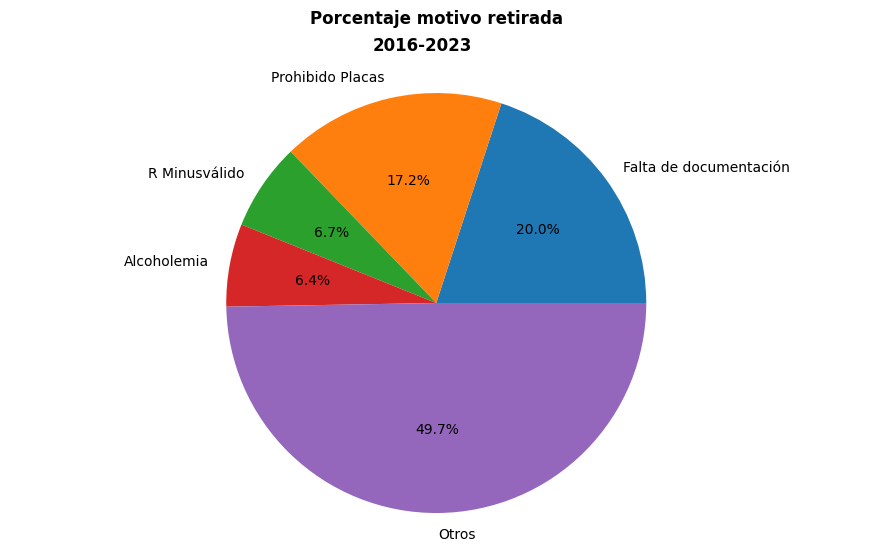

In [12]:
plt.figure(figsize=(11, 6))
plt.pie(df_motivos_pastel['Porcentaje'], labels=df_motivos_pastel['Motivo'], autopct='%1.1f%%', startangle=0)
plt.title('Porcentaje motivo retirada', fontweight='bold', pad=35)
plt.suptitle('2016-2023',fontweight='bold', y=0.94)
plt.axis('equal')  
plt.savefig("figura_primera_hipotesis/pastel_motivo.png")
plt.show()

Cuatro motivos son los responsables de poco más de la mitad de la retirada de vehículos de la vía pública en Madrid  
desde 2016 hasta 2023. Teniendo en cuenta que hay 61 motivos distintos,queda claro el peso de estos cuatro motivos.  
De hecho, los dos motivos más comunes son responsables de casi el 40% de las retiradas.    
Este es el motivo por el que para introducir la primera hipótesis he incluido este gráfico.

In [19]:
df_con_motivos.head(40)


,motivo,turno,Fecha_e,FinDeSema,Festivo,Hora_e
idVehiculo,,,,,,
CO20160101002327,Doble Fila,Noche,2016-01-01,False,Año Nuevo,00:05:00
CO20160101012710,Esquinas,Noche,2016-01-01,False,Año Nuevo,01:14:00
CO20160101031613,R Minusválido,Noche,2016-01-01,False,Año Nuevo,02:42:00
CO20160101031820,Doble Fila,Noche,2016-01-01,False,Año Nuevo,02:50:00
CO20160101031435,Prohibido Placas,Noche,2016-01-01,False,Año Nuevo,03:05:00
CO20160101033909,Paso Carruajes,Noche,2016-01-01,False,Año Nuevo,03:30:00
CO20160101054347,Quemado,Noche,2016-01-01,False,Año Nuevo,05:40:00
CO20160101070514,Alcoholemia,Noche,2016-01-01,False,Año Nuevo,07:00:00
ES20160101075109,Alcoholemia,Mañana,2016-01-01,False,Año Nuevo,07:49:00
